# Load data

In [1]:
import pandas as pd
path = "data/jobstreet_all_job_dataset.csv"

df = pd.read_csv(path, index_col=False, encoding='utf-8')

In [3]:
# eliminate 'role' similar to 'job_title'
df = df.drop(columns=['role'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69024 entries, 0 to 69023
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   job_id        69024 non-null  float64
 1   job_title     69024 non-null  object 
 2   company       69024 non-null  object 
 3   descriptions  69024 non-null  object 
 4   location      69024 non-null  object 
 5   category      69024 non-null  object 
 6   subcategory   69024 non-null  object 
 7   type          69024 non-null  object 
 8   salary        31594 non-null  object 
 9   listingDate   69024 non-null  object 
dtypes: float64(1), object(9)
memory usage: 5.3+ MB


In [5]:
# Filter data only year 2025 from listing_date
df['listingDate'] = pd.to_datetime(df['listingDate'], errors='coerce')
df = df[df['listingDate'].dt.year == 2025]

In [ ]:
df.to_csv("data/jobstreet_all_job_dataset_2025.csv", index=False, encoding='utf-8')
df.head()   

,job_id,job_title,company,descriptions,location,category,subcategory,type,salary,listingDate
59306,83134445.0,Booth Crew (Theme Park),Private Advertiser,The opportunity\nAs a Booth Crew (Theme Park) ...,"Batu Ferringhi, Penang",Hospitality & Tourism,Other,['Full time'],"RM 1,700 – RM 2,000 per month",2025-03-28 07:13:35+00:00
59307,82655033.0,UNIT TRUST CONSULTANT PART-TIME/FULL-TIME,Public Mutual (Supiah Binti Abdul Manan),Time to change your life for the better by Bec...,Penang,Banking & Financial Services,Client Services,['Full time'],"RM 6,000 – RM 8,000 per month",2025-03-10 10:17:48+00:00
59308,82824082.0,Shift Production Supervisor,Carsem (M) Sdn. Bhd,Job Responsibilities:\nTeam Supervision:\nTrai...,"Ipoh, Perak","Manufacturing, Transport & Logistics",Team Leaders/Supervisors,['Full time'],NaN,2025-03-17 02:26:59+00:00
59309,83143409.0,Bread Baker,KITCHENS OF THE WORLD HOLDINGS SDN. BHD.,Job summary:\nFlexible hours available\n1 year...,"Melaka, Melaka",Trades & Services,Bakers & Pastry Chefs,['Full time'],NaN,2025-03-28 09:56:46+00:00
59310,82934341.0,Accountant,Pembinaan Cara Hebat Sdn Bhd,"Degree/diploma in Accountancy or ACCA, CPA (or...","Batu Berendam, Melaka",Accounting,Financial Accounting & Reporting,['Full time'],"RM 3,500 – RM 4,500 per month",2025-03-20 07:50:00+00:00


In [7]:
print(f"{len(df)} rows remaining after filtering for year 2025")

9718 rows remaining after filtering for year 2025


In [8]:
print(df['category'].value_counts())

category
Accounting                                1325
Manufacturing, Transport & Logistics      1135
Sales                                      995
Engineering                                886
Information & Communication Technology     803
Administration & Office Support            681
Marketing & Communications                 553
Hospitality & Tourism                      354
Human Resources & Recruitment              341
Construction                               338
Call Centre & Customer Service             327
Retail & Consumer Products                 326
Banking & Financial Services               279
Healthcare & Medical                       233
Education & Training                       208
Trades & Services                          204
Design & Architecture                      178
Real Estate & Property                     123
Advertising, Arts & Media                   83
Science & Technology                        75
Legal                                       59
Insu

In [ ]:
print(f"Number of unique categories: {df['category'].nunique()}")

Number of unique categories: 29


In [ ]:
import pandas as pd
path = "data/jobstreet_all_job_dataset_2025.csv"

df = pd.read_csv(path, index_col=False, encoding='utf-8')

In [10]:
print(df['location'].value_counts().to_string())

location
Kuala Lumpur                                    1678
Petaling Jaya, Selangor                          519
Johor Bahru, Johor                               439
Kuala Lumpur City Centre, Kuala Lumpur           438
Selangor                                         294
Shah Alam, Selangor                              272
Penang                                           261
Kuching, Sarawak                                 195
Klang/Port Klang                                 189
Kota Kinabalu, Sabah                             185
Bayan Lepas, Penang                              172
Subang Jaya, Selangor                            166
Puchong, Selangor                                163
Ipoh, Perak                                      137
Senai, Johor                                     109
Melaka                                           100
Petaling, Selangor                                99
Bangsar South, Kuala Lumpur                       98
George Town, Penang                  

In [11]:
# Create a new column 'location_cleaned'
# 1. Split by comma
# 2. Take the last part ([-1])
# 3. Strip whitespace (to remove the space before " Selangor")
# 4. If no comma exists, keep the original text
df['location_cleaned'] = df['location'].apply(lambda x: x.split(',')[-1].strip() if ',' in str(x) else x)

# Check the results
print(df['location_cleaned'].value_counts())

location_cleaned
Kuala Lumpur            2812
Selangor                2527
Johor                   1125
Penang                  1023
Sarawak                  398
Sabah                    305
Melaka                   255
Perak                    247
Negeri Sembilan          207
Kedah                    202
Klang/Port Klang         189
Pahang                    94
Kajang/Bangi/Serdang      68
Malaysia                  65
Kelantan                  63
Shah Alam/Subang          47
Terengganu                41
Putrajaya                 39
Labuan                    10
Perlis                     1
Name: count, dtype: int64


# Data Preprocessing

- Fix Encoding Issues
- Eliminate Data Duplication
- Handle Missing Values
- Remove Noise Data (employer questions, HTML tags, URL tags, and special characters)
- Remove Other Languages
- Tokenization > Removing Stop Words > Stemming

## Eliminate Data Duplication

In [12]:
# remove duplicates
df.drop_duplicates(subset=['job_id'], inplace=True) 

In [13]:
# Number of unique values in jobid
print(f"Unique number of jobid: {df['job_id'].nunique()}")

Unique number of jobid: 9718


## Handle Missing Values

In [14]:
# Check for missing values
df.isnull().sum()

job_id                 0
job_title              0
company                0
descriptions           0
location               0
category               0
subcategory            0
type                   0
salary              4765
listingDate            0
location_cleaned       0
dtype: int64

In [15]:
# Replace missing values with 'Not Provided' for salary column
df['salary'] = df['salary'].fillna('Not Provided')

In [16]:
# Remove rows where 'descriptions' is NaN or not a string
df = df[df['descriptions'].apply(lambda x: isinstance(x, str))]

In [17]:
# Number of unique values in jobid
print(f"Unique number of jobid: {df['job_id'].nunique()}")

Unique number of jobid: 9718


## Remove Noise Data

In [18]:
import re
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
# import fasttext

In [ ]:
def clean_text(text):
    if not isinstance(text, str):
        return ''
    # Remove HTML tags
    clean = re.compile('<.*?>')
    text = re.sub(clean, '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    # Remove special characters and non-alphanumeric data
    text = re.sub(r'[^A-Za-z0-9\s]+', ' ', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    # Remove 'Employer questions' and everything after it
    text = re.sub(r"Employer questions.*", "", text, flags=re.DOTALL)
    # Remove 'Report this job advert' and everything after it
    text = re.sub(r"Report this job advert.*", "", text, flags=re.DOTALL)
    # Remove 'Employer questions' and everything after it
    text = re.sub(r"Apply now.*", "", text, flags=re.DOTALL)
    return text

# Apply cleaning before language detection
df['clean_descriptions'] = df['descriptions'].apply(clean_text)

In [20]:
df.head(1)

,job_id,job_title,company,descriptions,location,category,subcategory,type,salary,listingDate,location_cleaned,clean_descriptions
59306,83134445.0,Booth Crew (Theme Park),Private Advertiser,The opportunity\nAs a Booth Crew (Theme Park) ...,"Batu Ferringhi, Penang",Hospitality & Tourism,Other,['Full time'],"RM 1,700 – RM 2,000 per month",2025-03-28 07:13:35+00:00,Penang,The opportunity As a Booth Crew Theme Park at ...


## Others Language Removal

In [23]:
import matplotlib.pyplot as plt

In [24]:
from langdetect import DetectorFactory
DetectorFactory.seed = 42

def check_language_composition(text):
    """
    Check language composition of text and return percentage of English content
    """
    try:
        if not isinstance(text, str) or not text.strip():
            return {'en': 0, 'other': 0, 'main_language': 'unknown'}
            
        # Split into sentences/chunks for more accurate detection
        chunks = [chunk.strip() for chunk in text.split('.') if chunk.strip()]
        
        language_counts = {'en': 0, 'other': 0}
        detected_languages = []
        
        for chunk in chunks:
            try:
                lang = detect(chunk)
                detected_languages.append(lang)
                if lang == 'en':
                    language_counts['en'] += 1
                else:
                    language_counts['other'] += 1
            except LangDetectException:
                continue
                
        total = sum(language_counts.values())
        if total == 0:
            return {'en': 0, 'other': 0, 'main_language': 'unknown'}
            
        en_percentage = language_counts['en'] / total
        main_language = max(set(detected_languages), key=detected_languages.count) if detected_languages else 'unknown'
        
        return {
            'en': en_percentage,
            'other': 1 - en_percentage,
            'main_language': main_language
        }
    except Exception as e:
        print(f"Error processing text: {str(e)}")
        return {'en': 0, 'other': 0, 'main_language': 'error'}

# Apply the language check to descriptions
df['language_stats'] = df['clean_descriptions'].apply(check_language_composition)

# Extract statistics
df['en_percentage'] = df['language_stats'].apply(lambda x: x['en'])
df['main_language'] = df['language_stats'].apply(lambda x: x['main_language'])


In [25]:
# Print summary statistics
print("Language Distribution Summary:")
print("\nMain languages detected:")
print(df['main_language'].value_counts())

print("\nDescriptions with significant non-English content (>10%):")
mixed_language = df[df['en_percentage'] < 0.9]
print(f"Number of job posts with significant non-English content: {len(mixed_language)}")

# Sample of mixed-language posts
print("\nSample of job posts with mixed languages:")
sample_size = min(5, len(mixed_language))
for _, row in mixed_language.sample(sample_size).iterrows():
    print(f"\nJob Title: {row['job_title']}")
    print(f"English Content: {row['en_percentage']*100:.1f}%")
    print(f"Main Language: {row['main_language']}")
    print("First 200 characters of description:")
    print(row['clean_descriptions'][:200], "...")

Language Distribution Summary:

Main languages detected:
main_language
en    9566
id     152
Name: count, dtype: int64

Descriptions with significant non-English content (>10%):
Number of job posts with significant non-English content: 152

Sample of job posts with mixed languages:

Job Title: PEMBANTU AM
English Content: 0.0%
Main Language: id
First 200 characters of description:
Seorang yang berdisiplin dan menepati masa Boleh bertugas secara multi tasking Boleh bertugas lebih masa sekiranya diarahkan Seorang yang amanah jujur bertanggungjawab dan berintegriti dalam menjalank ...

Job Title: Sales Assistant - Grand Senheng Parklane Benoni, Papar
English Content: 0.0%
Main Language: id
First 200 characters of description:
Job Description Greet customers and ascertain what each customer wants or needs Recommend select and help locate or obtain product based on customer needs and desires Describe merchandise and explain  ...

Job Title: Head of Human Resource
English Content: 0.0%
Main 

In [26]:
# Remove non-English rows based on main_language column
df = df[df['main_language'] == 'en']
print(f"Number of rows remaining after filtering: {len(df)}")

Number of rows remaining after filtering: 9566


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\Administrator\Ap

True

## Contractions, stop words removal
1. Contractions
2. Tokenization
3. Stop words removal

In [27]:
import nltk
import matplotlib.pyplot as plt
import contractions
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [28]:
# Contractions
df['requirements'] = df['clean_descriptions'].apply(lambda x: [contractions.fix(word) for word in str(x).split()])
df['requirements'] = [' '.join(map(str, l)) for l in df['requirements']]

In [29]:
# Tokenization
df['tokenized_desc'] = df['requirements'].apply(word_tokenize)

In [30]:
# remove stopwords 
stop_words = set(stopwords.words('english'))
df['tokenized_desc'] = df['tokenized_desc'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokenized_desc_join'] = [' '.join(map(str, l)) for l in df['tokenized_desc']]

In [31]:
df.to_csv("data/jobstreet_all_job_dataset_2025_cleaned.csv", index=False, encoding='utf-8')

In [4]:
import pandas as pd
df = pd.read_csv("data/jobstreet_all_job_dataset_2025_cleaned.csv", index_col=False, encoding='utf-8') 

In [5]:
# Number of unique values in jobid
print(f"Unique number of category: {df['category'].nunique()}")

Unique number of category: 29


In [8]:
summary_table = pd.DataFrame({
    'Count': category_counts,
    'Percentage (%)': category_percent.round(2)
})

summary_table.style.set_properties(**{
    'text-align': 'center',
    'font-size': '14px'
}).set_table_styles([
    dict(selector='th', props=[('text-align', 'left'), ('font-weight', 'bold'), ('background-color', "#ffffff42")])
]).format({
    'Percentage (%)': "{:.2f}"
})

,Count,Percentage (%)
category,,
Accounting,1317,13.77
"Manufacturing, Transport & Logistics",1100,11.50
Sales,989,10.34
Engineering,878,9.18
Information & Communication Technology,801,8.37
Administration & Office Support,669,6.99
Marketing & Communications,548,5.73
Hospitality & Tourism,340,3.55
Human Resources & Recruitment,339,3.54


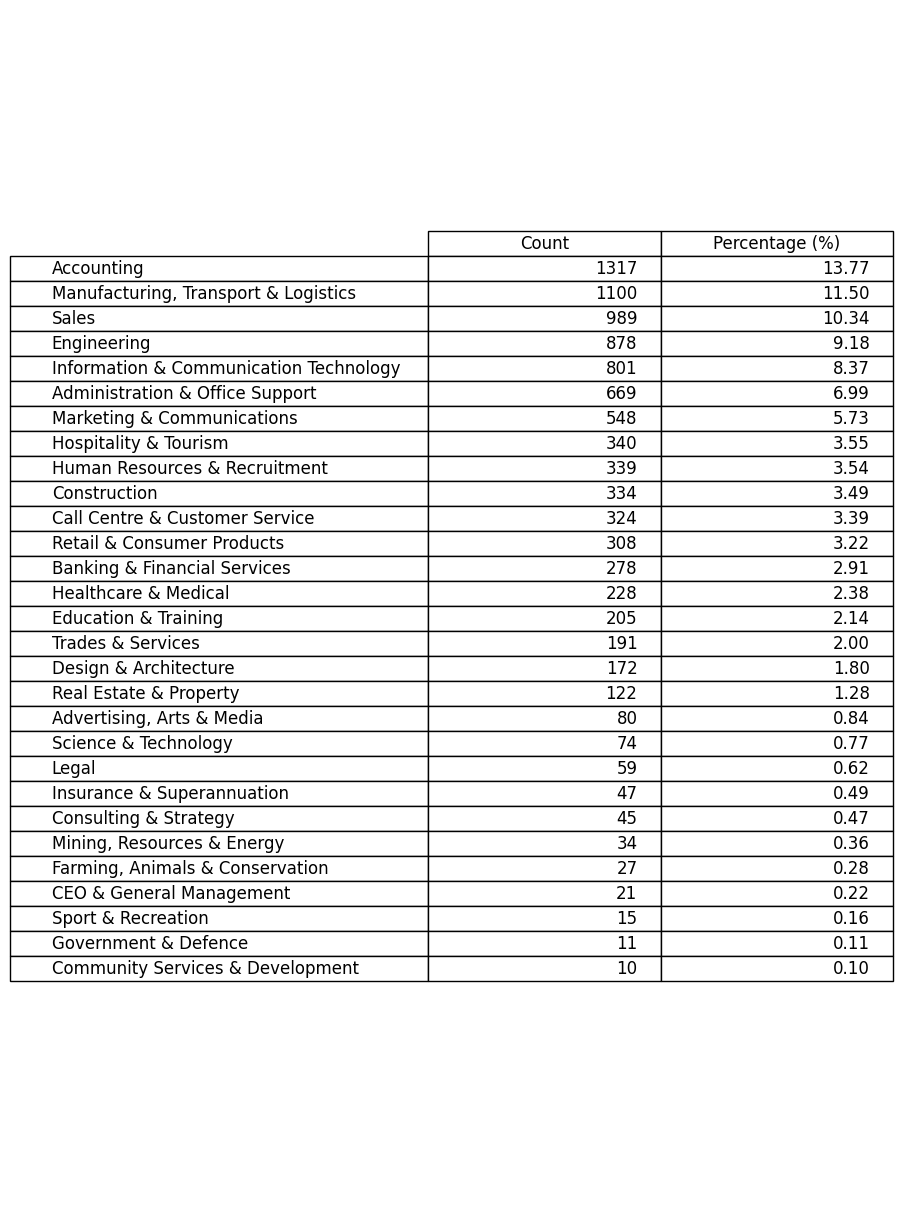

In [35]:
summary_table_for_image = summary_table.copy()
summary_table_for_image['Percentage (%)'] = summary_table_for_image['Percentage (%)'].map(lambda x: f"{x:.2f}")

# ---- PNG IMAGE GENERATION ----
fig, ax = plt.subplots(figsize=(6, len(summary_table)*0.5 + 1))
ax.axis('off')

table = ax.table(
    cellText=summary_table_for_image.values,   # use formatted strings
    colLabels=summary_table_for_image.columns,
    rowLabels=summary_table_for_image.index,
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

plt.savefig("category_table.png", dpi=300, bbox_inches='tight')
plt.show()

# Feature Engineering with NLP

## NER
### Start with Longest matchest

In [ ]:
import spacy
import pandas as pd
import ast 

skills_df = pd.read_excel("names.xlsx") 

# 2. Prepare Skills Dictionary for EntityRuler
# The EntityRuler expects patterns as a list of dictionaries: [{"label": "SKILL", "pattern": "skill phrase"}]
skills_list = skills_df['Name'].str.lower().str.strip().tolist()
patterns = [{"label": "SKILL", "pattern": skill} for skill in skills_list]

# 3. Initialize SpaCy Pipeline and EntityRuler
# Load the base model
nlp = spacy.load("en_core_web_sm") 

# Add the EntityRuler to the pipeline. 'overwrite_ents=True' ensures that the ruler 
# determines the final, non-overlapping entities (skills).
ruler = nlp.add_pipe("entity_ruler", before="ner", config={"overwrite_ents": True})

# Add the skill patterns to the ruler
ruler.add_patterns(patterns) 

# 4. Define the Extraction Function
def extract_skills_ruler(text):
    """
    Extracts skills using the SpaCy EntityRuler, which enforces 
    non-overlapping, longest-match-first logic.
    """
    if not isinstance(text, str):
        return []

    # Process the tokenized job description
    doc = nlp(text.lower()) 
    
    # doc.ents contains the final, non-overlapping entities/skills found by the ruler
    found_skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]
    
    # We use a set for final deduplication just in case
    return sorted(list(set(found_skills)))

# 5. Apply the function to the 'tokenized_desc_join' column
df['skills'] = df['tokenized_desc_join'].apply(extract_skills_ruler)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
df.to_csv("data/jobstreet_all_job_dataset_2025_skills.csv", index=False, encoding='utf-8')

In [2]:
import pandas as pd
df = pd.read_csv("data/jobstreet_all_job_dataset_2025_skills.csv", index_col=False, encoding='utf-8')

### Fine-tuned

In [45]:
import random
import numpy as np
import spacy
from spacy.training import Example
from spacy.util import minibatch, compounding, fix_random_seed
import ast
import os
import re  
import matplotlib.pyplot as plt


# Set random seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
fix_random_seed(SEED)

# Ensure 'skills' column parsed correctly
df['skills'] = df['skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


# Create training examples
def create_training_examples(df):
    training_examples = []
    for _, row in df.iterrows():
        text = row['tokenized_desc_join']
        skills = row['skills']
        entities = []
        for skill in skills:
            # Case-insensitive match with word boundaries
            for match in re.finditer(r'\b' + re.escape(skill) + r'\b', text.lower()):
                start, end = match.span()
                if (start == 0 or not text[start-1].isalnum()) and (end == len(text) or not text[end].isalnum()):
                    entities.append((start, end, "SKILL"))
        if entities:
            training_examples.append((text, {"entities": entities}))
    return training_examples

training_data = create_training_examples(df)
print(f"Created {len(training_data)} training examples")


# Split into train/validation (fixed seed)
split = int(len(training_data) * 1.0)  # use all data for training
train_data = training_data[:split]
# valid_data = training_data[split:]

# Initialize spaCy model
nlp = spacy.blank("en")
ner = nlp.add_pipe("ner")
ner.add_label("SKILL")

loss_history = []

# Fix initialization randomness
optimizer = nlp.initialize()

print("Beginning training...")

# Training parameters
batch_sizes = compounding(4.0, 32.0, 1.001)
n_iter = 10
dropout_rate = 0.5  # set to 0.0 for full deterministic debugging

# Training loop
with nlp.select_pipes(enable=["ner"]):
    for iteration in range(n_iter):
        losses = {}

        # Deterministic shuffling
        random.Random(SEED + iteration).shuffle(train_data)

        batches = minibatch(train_data, size=batch_sizes)
        for batch in batches:
            examples = []
            for text, annotations in batch:
                doc = nlp.make_doc(text)

                # Handle overlapping entities by prioritizing longer spans
                entities = sorted(annotations['entities'], key=lambda x: x[1] - x[0], reverse=True)
                filtered_entities = []
                spans = []

                for start, end, label in entities:
                    overlap = any(max(start, s_start) < min(end, s_end) for s_start, s_end in spans)
                    if not overlap:
                        filtered_entities.append((start, end, label))
                        spans.append((start, end))

                example = Example.from_dict(doc, {"entities": filtered_entities})
                examples.append(example)

            # Update model
            nlp.update(examples, drop=dropout_rate, sgd=optimizer, losses=losses)

        # Store loss
        loss_history.append(losses["ner"])

        print(f"Iteration {iteration + 1}, Loss: {losses}")


# Save model
output_dir = "./skill_ner_model"
os.makedirs(output_dir, exist_ok=True)
nlp.to_disk(output_dir)
print(f"Model saved to {output_dir}")

Created 9385 training examples
Beginning training...
Iteration 1, Loss: {'ner': np.float32(122805.95)}
Iteration 2, Loss: {'ner': np.float32(81209.17)}
Iteration 3, Loss: {'ner': np.float32(73283.03)}
Iteration 4, Loss: {'ner': np.float32(68570.78)}
Iteration 5, Loss: {'ner': np.float32(64803.277)}
Iteration 6, Loss: {'ner': np.float32(61694.63)}
Iteration 7, Loss: {'ner': np.float32(59440.113)}
Iteration 8, Loss: {'ner': np.float32(57404.992)}
Iteration 9, Loss: {'ner': np.float32(55609.37)}
Iteration 10, Loss: {'ner': np.float32(53668.727)}
Model saved to ./skill_ner_model


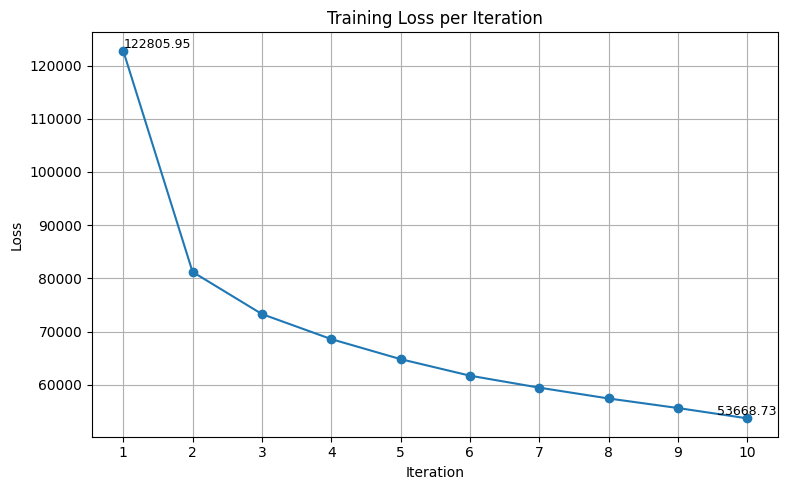

In [51]:
# Show value of loss first and last
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(loss_history)+1), loss_history, marker='o')
plt.title("Training Loss per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.xticks(range(1, len(loss_history)+1))  
plt.grid(True)

# Coordinates
first_x = 1
first_y = loss_history[0]
last_x  = len(loss_history)
last_y  = loss_history[-1]

# Put values above the markers
plt.text(first_x, first_y, f"{first_y:.2f}", ha='left', va='bottom', fontsize=9)
plt.text(last_x, last_y, f"{last_y:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [52]:
import spacy
# Load the saved model from disk
loaded_nlp = spacy.load("./skill_ner_model")

# Create a function to extract skills from text using our trained model
def extract_skills(text):
    doc = loaded_nlp(text)
    skills = [ent.text for ent in doc.ents if ent.label_ == "SKILL"]
    return skills

# Apply the function to all descriptions and create a new column
df['ner_skills'] = df['tokenized_desc_join'].apply(extract_skills)

# lowercase the extracted skills
df['ner_skills'] = df['ner_skills'].apply(lambda x: [skill.lower() for skill in x])

In [53]:
# Remove duplicates and sort the skills in each list
df['ner_skills'] = df['ner_skills'].apply(lambda x: sorted(dict.fromkeys(x)) if isinstance(x, list) else x)

In [9]:
# Compare skills extracted from both methods
for index, row in df.head().iterrows():
    print(f"\nJob Title: {row['job_title']}")
    print("Skills from original extraction:", row['skills'])
    print("Skills from NER model:", row['ner_skills'])


Job Title: Booth Crew (Theme Park)
Skills from original extraction: ['communication', 'customer service', 'decision making', 'problem solving']
Skills from NER model: ['communication', 'customer service', 'decision making', 'problem solving']

Job Title: UNIT TRUST CONSULTANT PART-TIME/FULL-TIME
Skills from original extraction: ['customer service', 'market potential', 'professionalism', 'registration', 'subsidies', 'time horizon']
Skills from NER model: ['customer service', 'network distribution', 'professionalism', 'registration']

Job Title: Shift Production Supervisor
Skills from original extraction: ['accountability', 'collaboration', 'communication', 'management', 'microsoft excel', 'people management', 'planning', 'production management', 'registration', 'safety procedures', 'supervision']
Skills from NER model: ['accountability', 'collaboration', 'communication', 'management', 'microsoft excel', 'people management', 'planning', 'production management', 'registration', 'safety p

In [ ]:
# Calculate skill counts
df['skill_count'] = df['ner_skills'].apply(len)

In [ ]:
df.to_csv("data/jobstreet_all_job_dataset_2025_skills_ner.csv", index=False, encoding='utf-8')

In [1]:
import pandas as pd
df = pd.read_csv("data/jobstreet_all_job_dataset_2025_skills_ner.csv", index_col=False, encoding='utf-8')

In [ ]:
# Visualize the most common skills
import matplotlib.pyplot as plt
from collections import Counter

# Get all skills and count their frequencies
all_skills = [skill for skills_list in df['ner_skills'] for skill in eval(skills_list) if isinstance(skills_list, str)]
skill_counts = Counter(all_skills).most_common(20)  # Get top 20 skills

# Extract skills and their counts
skills, counts = zip(*skill_counts)

In [14]:
# Total Unique Skills Identified
unique_skills = set(all_skills)
print("Number of unique skills:", len(unique_skills))

Number of unique skills: 5441


In [11]:
# Average Skills per Job Posting
average_skills = df['skill_count'].mean()

print("Average skills per job posting:", round(average_skills, 2))

Average skills per job posting: 11.59


In [12]:
# Postings with >10 Skills
num_over_10 = (df['skill_count'] > 10).sum()

print("Number of postings with >10 skills:", num_over_10)

Number of postings with >10 skills: 4700


In [13]:
# Postings with <5 Skills
num_less_5 = (df['skill_count'] < 5).sum()

print("Number of postings with <5 skills:", num_less_5)

Number of postings with <5 skills: 1450


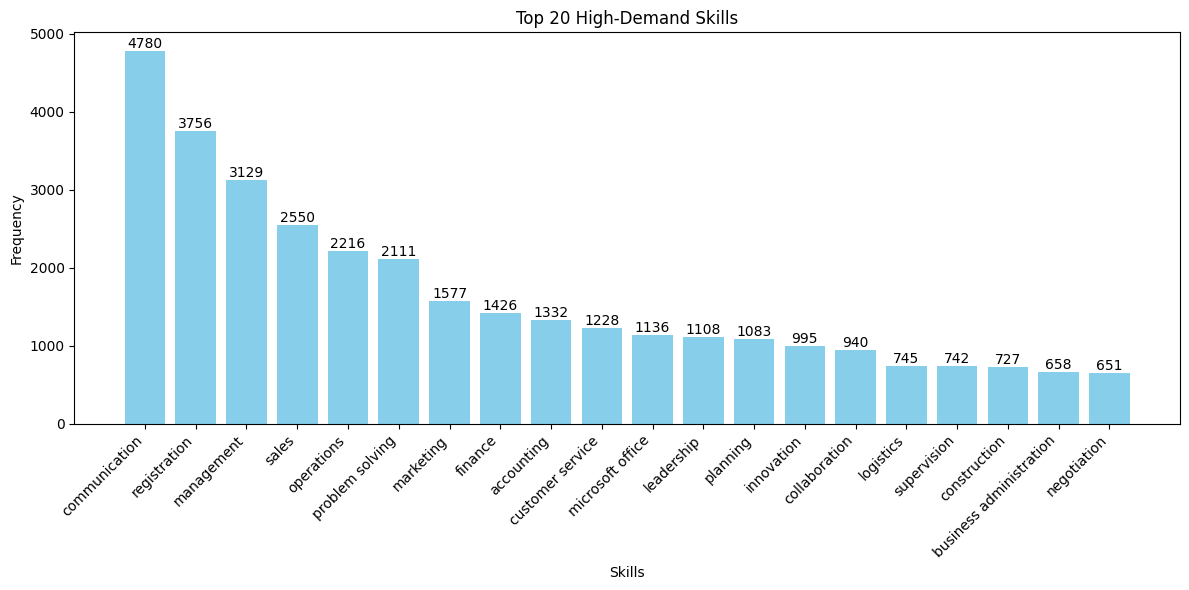

In [4]:
# Create bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(skills)), counts, color='skyblue')

# Add count labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(counts[i]),
        ha='center',
        va='bottom',
        fontsize=10
    )
    
plt.xticks(range(len(skills)), skills, rotation=45, ha='right')
plt.title('Top 20 High-Demand Skills')
plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Embeddings

In [2]:
# Text embedding
from sentence_transformers import SentenceTransformer
import numpy as np
import ast

# If skills are stored as strings like "[skill1, skill2]"
df['ner_skills'] = df['ner_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

model = SentenceTransformer('all-MiniLM-L6-v2')

def embed_skills(skills):
    # print(f"Input skills: {skills}, Type: {type(skills)}")
    if not isinstance(skills, list):
        # print("Not a list - returning zeros")
        return np.zeros(model.get_sentence_embedding_dimension())
    if len(skills) == 0:
        # print("Empty list - returning zeros")
        return np.zeros(model.get_sentence_embedding_dimension())
    # print(f"Processing {len(skills)} skills")
    embeddings = model.encode(skills)
    return np.mean(embeddings, axis=0)

df['ner_skills_embedding'] = df['ner_skills'].apply(embed_skills)

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### UMAP

In [ ]:
import umap
import numpy as np
import ast

# Convert string representations of embeddings to numpy arrays
embeddings = np.vstack(df['ner_skills_embedding'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x))

# Create and fit UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=50, random_state=42)
embeddings_50d = reducer.fit_transform(embeddings)

# Add the reduced dimensions to the dataframe
df['umap_50d'] = list(embeddings_50d)
print(f"Reduced Shape (50D): {embeddings_50d.shape}")

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Reduced Shape (50D): (9566, 50)


# Clustering
## KMeans

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import ast
import matplotlib.pyplot as plt

Data prepared for clustering. Shape: (9566, 50)


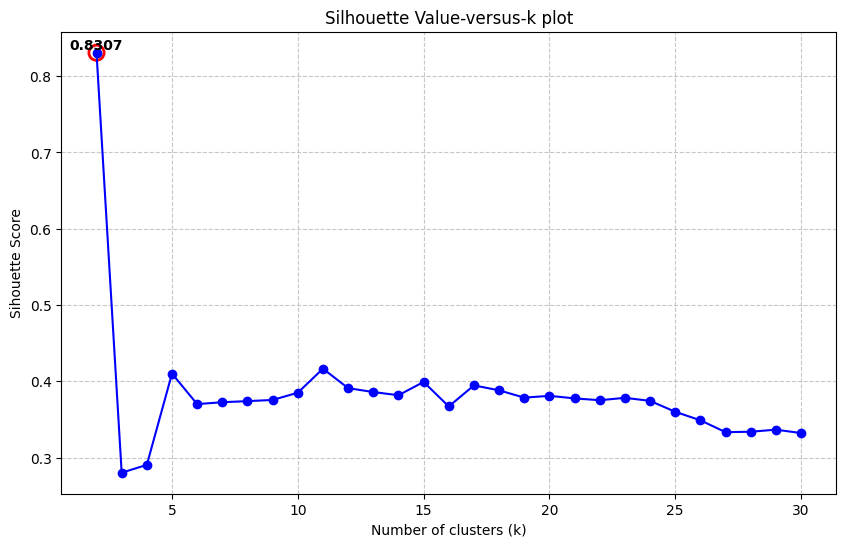

In [5]:
# Find k using Silhouette Score
from sklearn.metrics import silhouette_score
X = np.vstack(df['umap_50d'].values)
print(f"Data prepared for clustering. Shape: {X.shape}")

sil = []
kmax = 30
k_range = range(2, kmax+1)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state=42).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sihouette Score')
plt.title('Silhouette Value-versus-k plot')
plt.grid(True, linestyle='--', alpha=0.7) 
# plt.xticks(k_range)
# find max sil value and corresponding k
max_sil = max(sil)
max_k = k_range[sil.index(max_sil)]

# annotate on plot
plt.text(max_k, max_sil, f"{max_sil:.4f}", 
         ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.scatter(max_k, max_sil, s=120, facecolors='none', edgecolors='red', linewidth=2)

plt.show()

Data prepared for clustering. Shape: (9566, 50)


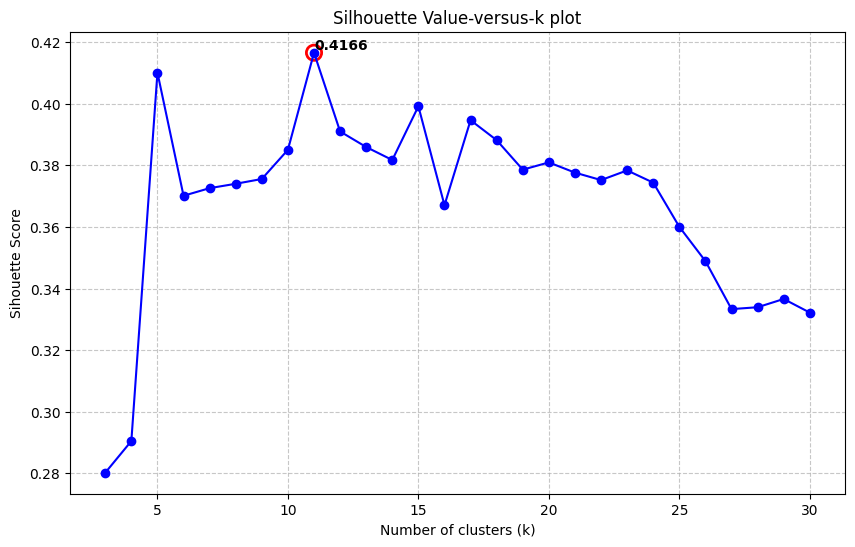

In [6]:
# Find k using Silhouette Score
from sklearn.metrics import silhouette_score
X = np.vstack(df['umap_50d'].values)
print(f"Data prepared for clustering. Shape: {X.shape}")

sil = []
kmax = 30
k_range = range(3, kmax+1)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in k_range:
  kmeans = KMeans(n_clusters = k, random_state=42).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

# Plotting the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sil, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sihouette Score')
plt.title('Silhouette Value-versus-k plot')
plt.grid(True, linestyle='--', alpha=0.7) 
# plt.xticks(k_range)
# find max sil value and corresponding k
max_sil = max(sil)
max_k = k_range[sil.index(max_sil)]

# annotate on plot
plt.text(max_k, max_sil, f"{max_sil:.4f}", 
         ha='left', va='bottom', fontsize=10, fontweight='bold')

plt.scatter(max_k, max_sil, s=120, facecolors='none', edgecolors='red', linewidth=2)

plt.show()

In [7]:
# --- 4. Run K-Means with the Chosen k ---
# --- IMPORTANT: CHANGE THIS VALUE BASED ON YOUR ELBOW PLOT ---
optimal_k = 11  # Example value. You should change this!
print(f"Running K-Means with k={optimal_k}...")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans.fit(X)

# Add the cluster labels back to your DataFrame
df['cluster'] = kmeans.labels_
print("Clustering complete. Cluster labels have been added to the data.")

Running K-Means with k=11...
Clustering complete. Cluster labels have been added to the data.


In [8]:
KMEANS_clust_sizes = df.groupby('cluster').size().to_frame()
KMEANS_clust_sizes.columns = ["KMEANS_size"]
KMEANS_clust_sizes

,KMEANS_size
cluster,
0,1752
1,184
2,1658
3,1335
4,75
5,1719
6,25
7,617
8,10


In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# --- 1. Prepare the Data ---
X = np.vstack(df['umap_50d'].values)
labels = df['cluster']   # Cluster labels from KMeans

print(f"Data prepared for evaluation. Found {len(df)} skills in {labels.nunique()} clusters.")

# --- 2. Silhouette Score ---
print("\nCalculating Silhouette Score...")
sil_score = silhouette_score(X, labels, metric='euclidean')

# --- 3. Davies–Bouldin Index ---
print("\nCalculating Davies–Bouldin Index...")
dbi_score = davies_bouldin_score(X, labels)

# --- 4. Calinski–Harabasz Index ---
print("\nCalculating Calinski–Harabasz Index...")
chi_score = calinski_harabasz_score(X, labels)

# --- 5. Print Summary ---
print("\nClustering Evaluation")
print(f"Silhouette Score:           {sil_score:.4f}")
print(f"Davies–Bouldin Index (DBI): {dbi_score:.4f}")
print(f"Calinski–Harabasz Index:    {chi_score:.4f}")

Data prepared for evaluation. Found 9566 skills in 11 clusters.

Calculating Silhouette Score...

Calculating Davies–Bouldin Index...

Calculating Calinski–Harabasz Index...

Clustering Evaluation
Silhouette Score:           0.4166
Davies–Bouldin Index (DBI): 0.6772
Calinski–Harabasz Index:    12710.1943


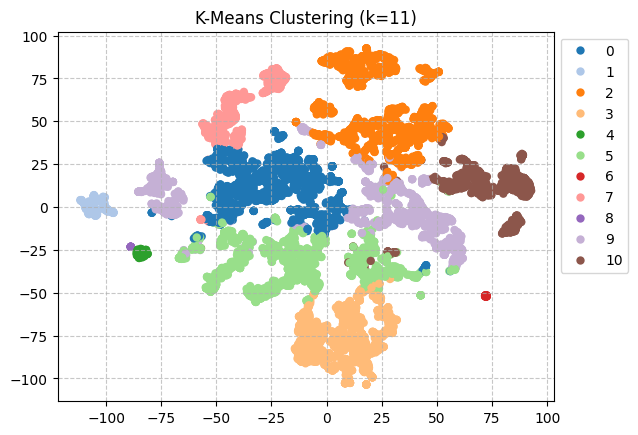

In [13]:
# k=11
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d_tsne = tsne.fit_transform(embeddings_50d)

# Plot K-means clusters for comparison
# scatter = plt.scatter(embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1], 
#                       c=df['cluster'], cmap='viridis')
# plt.title('K-means Clustering')
# plt.colorbar(scatter)
# plt.show()

import seaborn as sns
sns.scatterplot(
    x=embeddings_2d_tsne[:, 0], 
    y=embeddings_2d_tsne[:, 1],
    hue=df['cluster'],          # Color points by the 'cluster' column
    palette='tab20',          # Use the same color scheme                    
    legend='full',
    linewidth=0
)

plt.title('K-Means Clustering (k=11)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Convert string representations of embeddings to numpy arrays if needed
def get_embedding(x):
    if isinstance(x, str):
        return np.array(ast.literal_eval(x))
    return x

# Calculate average cosine similarity within each cluster
def calculate_cluster_cohesion(cluster_embeddings):
    if len(cluster_embeddings) <= 1:
        return 0.0
    similarities = cosine_similarity(cluster_embeddings)
    # Exclude self-similarity (diagonal)
    np.fill_diagonal(similarities, 0)
    # Calculate mean similarity
    return np.mean(similarities)

# Calculate cluster cohesion metrics
cluster_metrics = {}
for cluster_id in range(optimal_k):
    # Get embeddings for this cluster
    cluster_mask = df['cluster'] == cluster_id
    cluster_embeddings = np.vstack(df[cluster_mask]['umap_50d'].apply(get_embedding))
    
    # Calculate metrics
    cluster_size = cluster_mask.sum()
    cohesion = calculate_cluster_cohesion(cluster_embeddings)
    
    cluster_metrics[cluster_id] = {
        'size': cluster_size,
        'cohesion': cohesion
    }

# Create a DataFrame with the results
results_df = pd.DataFrame.from_dict(cluster_metrics, orient='index')
results_df.index.name = 'Cluster'
#results_df = results_df.sort_values('cohesion', ascending=False)

# Print results
print("Cluster Evaluation Results:")
print("\nCluster Cohesion (average cosine similarity):")
print(results_df)
print("\nOverall average cohesion:", results_df['cohesion'].mean())

Cluster Evaluation Results:

Cluster Cohesion (average cosine similarity):
         size  cohesion
Cluster                
0        1752  0.998546
1         184  0.994541
2        1658  0.998197
3        1335  0.998554
4          75  0.986660
5        1719  0.998010
6          25  0.959978
7         617  0.997861
8          10  0.900000
9        1408  0.997940
10        783  0.998187

Overall average cohesion: 0.9844067


## DBSCAN

In [6]:
from sklearn.cluster import DBSCAN
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

embeddings = np.stack(df['umap_50d'].values)

eps_values = np.arange(0.1,1,0.1) # eps values to be investigated
min_samples = np.arange(3,15) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

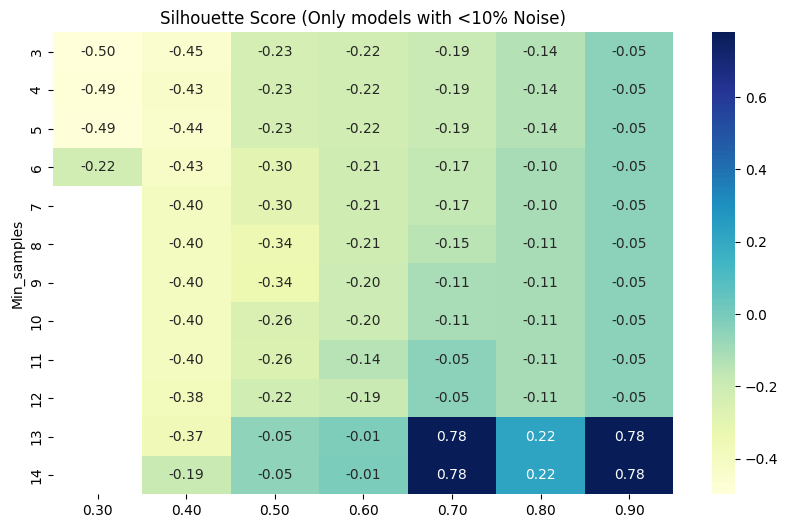

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import seaborn as sns
import matplotlib.pyplot as plt

results = []

for p in DBSCAN_params:
    # Fit DBSCAN
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(embeddings)
    labels = DBS_clustering.labels_
    
    # 1. Calculate Noise Percentage
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)
    
    # 2. Calculate Silhouette (only if valid)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0) # Count real clusters
    
    score = np.nan
    if n_clusters > 1:
        # Filter out noise for silhouette calculation
        mask = labels != -1
        score = silhouette_score(embeddings[mask], labels[mask])
        
    results.append([p[0], p[1], score, noise_ratio])

# Create DataFrame
df_results = pd.DataFrame(results, columns=['Eps', 'Min_samples', 'Sil_Score', 'Noise_Ratio'])

# FILTER: Only show models with < 10% Noise
valid_models = df_results[df_results['Noise_Ratio'] < 0.1]

# Pivot for Heatmap (Silhouette)
pivot_sil = pd.pivot_table(valid_models, values='Sil_Score', index='Min_samples', columns='Eps')
pivot_sil.columns = [f"{c:.2f}" for c in pivot_sil.columns]

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(pivot_sil, annot=True, cmap='YlGnBu',fmt=".2f")
plt.title('Silhouette Score (Only models with <10% Noise)')
plt.show()

In [8]:
DBS_clustering = DBSCAN(eps=0.9, min_samples=14).fit(embeddings)

DBSCAN_clustered = df.copy()
DBSCAN_clustered.loc[df.index, 'Cluster'] = DBS_clustering.labels_

In [9]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1.0,44
0.0,9238
1.0,184
2.0,75
3.0,25


In [ ]:
# 1. Count the number of noise points (Label is -1)
n_noise = (DBSCAN_clustered['Cluster'] == -1).sum()

# 2. Get the total number of points
total_samples = len(DBSCAN_clustered)

# 3. Calculate the ratio
noise_ratio = n_noise / total_samples

print(f"Noise Count: {n_noise}")
print(f"Total Samples: {total_samples}")
print(f"Noise Ratio: {noise_ratio:.2%}")

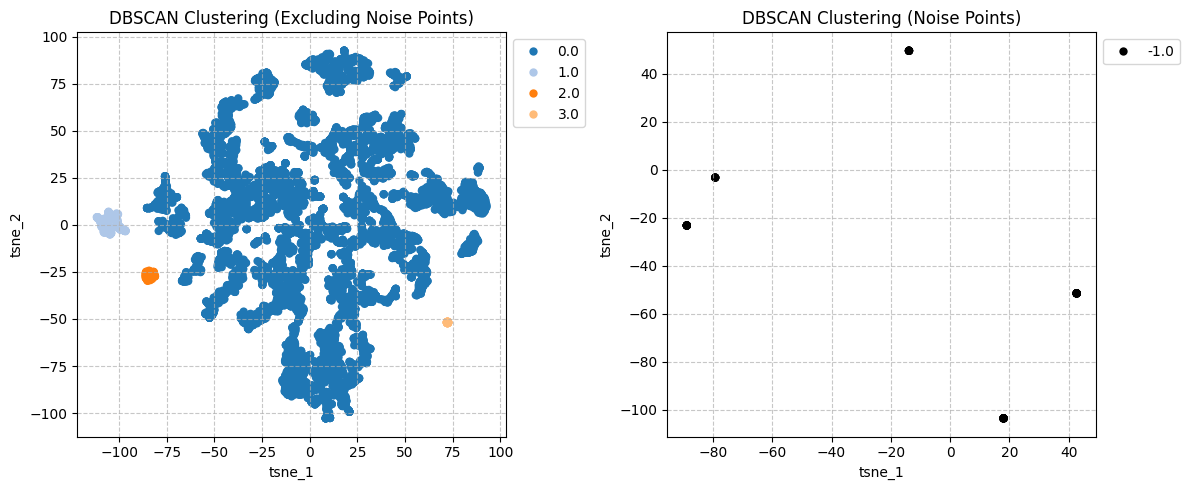

In [ ]:
# tsne = TSNE(n_components=2, random_state=42)
# embeddings_2d_tsne = tsne.fit_transform(embeddings_scaled)
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d_tsne = tsne.fit_transform(embeddings_50d)

# Create a DataFrame with t-SNE coordinates and cluster labels
tsne_df = pd.DataFrame(embeddings_2d_tsne, columns=['tsne_1', 'tsne_2'])
tsne_df['Cluster'] = DBSCAN_clustered['Cluster']

# Filter out noise points (cluster -1)
tsne_df_filtered = tsne_df[tsne_df['Cluster'] != -1]
tsne_df_noise = tsne_df[tsne_df['Cluster'] == -1]

# --- Plot side by side ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(
    data=tsne_df_filtered,
    x='tsne_1',
    y='tsne_2',
    hue='Cluster',
    palette='tab20',
    legend='full',
    linewidth=0
)

plt.title('DBSCAN Clustering (Excluding Noise Points)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.scatterplot(
    data=tsne_df_noise,
    x='tsne_1',
    y='tsne_2',
    hue='Cluster',
    palette='gray',
    legend='full',
    linewidth=0
)

plt.title('DBSCAN Clustering (Noise Points)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
import numpy as np

# Get the data points and cluster labels
X = np.vstack(df['umap_50d'].values)
labels = DBSCAN_clustered['Cluster']

# Filter out noise points (labeled as -1) for silhouette calculation
mask = labels != -1
X_filtered = X[mask]
labels_filtered = labels[mask]

# Calculate silhouette score if there are at least 2 clusters (excluding noise)
if len(np.unique(labels_filtered)) >= 2:
    silhouette_avg = silhouette_score(X_filtered, labels_filtered)
    print(f"Silhouette Score (excluding noise points): {silhouette_avg:.3f}")
    print(f"Number of points used in calculation: {len(X_filtered)}")
    print(f"Number of noise points excluded: {len(X) - len(X_filtered)}")
else:
    print("Not enough clusters to calculate silhouette score")

Silhouette Score (excluding noise points): 0.779
Number of points used in calculation: 9522
Number of noise points excluded: 44


In [19]:
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Extract data and labels
X = np.vstack(df['umap_50d'].values)
labels = DBSCAN_clustered['Cluster']

# Filter out noise (-1)
mask = labels != -1
X_filtered = X[mask]
labels_filtered = labels[mask]

# Compute DBI if cluster count ≥ 2
if len(np.unique(labels_filtered)) >= 2:
    dbi_score = davies_bouldin_score(X_filtered, labels_filtered)
    print(f"Davies–Bouldin Index (excluding noise): {dbi_score:.3f}")
    print(f"Number of points used: {len(X_filtered)}")
    print(f"Number of noise points excluded: {len(X) - len(X_filtered)}")
else:
    print("Not enough clusters to calculate DBI.")

Davies–Bouldin Index (excluding noise): 0.150
Number of points used: 9522
Number of noise points excluded: 44


In [20]:
from sklearn.metrics import calinski_harabasz_score
import numpy as np

# Extract data and labels
X = np.vstack(df['umap_50d'].values)
labels = DBSCAN_clustered['Cluster']

# Filter out noise (-1)
mask = labels != -1
X_filtered = X[mask]
labels_filtered = labels[mask]

# Compute CHI if cluster count ≥ 2
if len(np.unique(labels_filtered)) >= 2:
    chi_score = calinski_harabasz_score(X_filtered, labels_filtered)
    print(f"Calinski–Harabasz Index (excluding noise): {chi_score:.3f}")
    print(f"Number of points used: {len(X_filtered)}")
    print(f"Number of noise points excluded: {len(X) - len(X_filtered)}")
else:
    print("Not enough clusters to calculate CHI.")


Calinski–Harabasz Index (excluding noise): 6131.505
Number of points used: 9522
Number of noise points excluded: 44


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
from ast import literal_eval

# Convert string representations of embeddings to numpy arrays if needed
def get_embedding(x):
    if isinstance(x, str):
        return np.array(literal_eval(x))
    return x

# Calculate average cosine similarity within a cluster
def calculate_cluster_cohesion(cluster_embeddings):
    if len(cluster_embeddings) <= 1:
        return 0.0
    similarities = cosine_similarity(cluster_embeddings)
    # remove self-similarity on diagonal
    np.fill_diagonal(similarities, 0)
    return np.mean(similarities)

# --- 🔧 FIX: Merge DBSCAN cluster labels directly into df to keep indexes aligned ---
df2 = df.copy()
df2['Cluster'] = DBSCAN_clustered['Cluster'].values

# --- Exclude noise points (Cluster = -1) ---
df2 = df2[df2['Cluster'] != -1]

# Get list of real clusters
unique_clusters = sorted(df2['Cluster'].unique())

cluster_metrics = {}

# --- Calculate cohesion per cluster ---
for cluster_id in unique_clusters:
    cluster_data = df2[df2['Cluster'] == cluster_id]
    
    # Stack embeddings
    cluster_embeddings = np.vstack(cluster_data['umap_50d'].apply(get_embedding))
    
    # Compute cluster size and cohesion
    cluster_size = len(cluster_data)
    cohesion = calculate_cluster_cohesion(cluster_embeddings)
    
    cluster_metrics[cluster_id] = {
        'size': cluster_size,
        'cohesion': cohesion
    }

# --- Convert to dataframe ---
results_df = pd.DataFrame.from_dict(cluster_metrics, orient='index')
results_df.index.name = 'Cluster'
results_df = results_df.sort_values('cohesion', ascending=False)

# --- Print results ---
print("Cluster Evaluation Results (Noise Excluded):")
print("\nCluster Cohesion (average cosine similarity):")
print(results_df)

print("\nOverall average cohesion (excluding noise):", results_df['cohesion'].mean())

Cluster Evaluation Results (Noise Excluded):

Cluster Cohesion (average cosine similarity):
         size  cohesion
Cluster                
0.0      9238  0.995030
1.0       184  0.994541
2.0        75  0.986660
3.0        25  0.959978

Overall average cohesion (excluding noise): 0.98405206


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Convert string representations of embeddings to numpy arrays if needed
def get_embedding(x):
    if isinstance(x, str):
        return np.array(ast.literal_eval(x))
    return x

# Calculate average cosine similarity within each cluster
def calculate_cluster_cohesion(cluster_embeddings):
    if len(cluster_embeddings) <= 1:
        return 0.0
    similarities = cosine_similarity(cluster_embeddings)
    # Exclude self-similarity (diagonal)
    np.fill_diagonal(similarities, 0)
    # Calculate mean similarity
    return np.mean(similarities)

# Calculate cluster cohesion metrics
cluster_metrics = {}
unique_clusters = sorted(DBSCAN_clustered['Cluster'].unique())

for cluster_id in unique_clusters:
    # Get embeddings for this cluster
    cluster_mask = DBSCAN_clustered['Cluster'] == cluster_id
    cluster_embeddings = np.vstack(df[cluster_mask]['umap_50d'].apply(get_embedding))
    
    # Calculate metrics
    cluster_size = cluster_mask.sum()
    cohesion = calculate_cluster_cohesion(cluster_embeddings)
    
    cluster_metrics[cluster_id] = {
        'size': cluster_size,
        'cohesion': cohesion
    }

# Create a DataFrame with the results
results_df = pd.DataFrame.from_dict(cluster_metrics, orient='index')
results_df.index.name = 'Cluster'
results_df = results_df.sort_values('cohesion', ascending=False)

# Print results
print("Cluster Evaluation Results:")
print("\nCluster Cohesion (average cosine similarity):")
print(results_df)
print("\nOverall average cohesion:", results_df['cohesion'].mean())

Cluster Evaluation Results:

Cluster Cohesion (average cosine similarity):
         size  cohesion
Cluster                
 0.0     9238  0.995030
 1.0      184  0.994541
 2.0       75  0.986660
 3.0       25  0.959978
-1.0       44  0.913071

Overall average cohesion: 0.9698558


## Cluster Analysis (KMeans)

In [11]:
# Get the dominant categories for each cluster
cluster_labels = {}
for cluster_id in range(optimal_k):
    # Get all jobs in this cluster
    cluster_jobs = df[df['cluster'] == cluster_id]
    
    # Count categories in this cluster
    category_counts = cluster_jobs['category'].value_counts()
    
    # Get top 3 categories and their percentages
    total_jobs = len(cluster_jobs)
    top_categories = category_counts.head(3)
    top_percentages = (top_categories / total_jobs * 100).round(2)
    
    # Create cluster label using the dominant category
    dominant_category = top_categories.index[0]
    cluster_labels[cluster_id] = {
        'label': dominant_category,
        'size': total_jobs,
        'top_categories': dict(top_percentages)
    }

# Print cluster analysis
print("Cluster Analysis:")
print("-" * 50)
for cluster_id, info in cluster_labels.items():
    print(f"\nCluster {cluster_id}: {info['label']}")
    print(f"Size: {info['size']} jobs")
    print("Top categories:")
    for category, percentage in info['top_categories'].items():
        print(f"  - {category}: {percentage}%")

Cluster Analysis:
--------------------------------------------------

Cluster 0: Sales
Size: 1752 jobs
Top categories:
  - Sales: 43.44%
  - Retail & Consumer Products: 11.02%
  - Call Centre & Customer Service: 7.76%

Cluster 1: Accounting
Size: 184 jobs
Top categories:
  - Accounting: 23.37%
  - Manufacturing, Transport & Logistics: 19.02%
  - Hospitality & Tourism: 10.33%

Cluster 2: Engineering
Size: 1658 jobs
Top categories:
  - Engineering: 41.38%
  - Manufacturing, Transport & Logistics: 19.36%
  - Construction: 16.95%

Cluster 3: Accounting
Size: 1335 jobs
Top categories:
  - Accounting: 82.77%
  - Administration & Office Support: 6.52%
  - Banking & Financial Services: 4.27%

Cluster 4: Manufacturing, Transport & Logistics
Size: 75 jobs
Top categories:
  - Manufacturing, Transport & Logistics: 18.67%
  - Accounting: 13.33%
  - Hospitality & Tourism: 10.67%

Cluster 5: Administration & Office Support
Size: 1719 jobs
Top categories:
  - Administration & Office Support: 19.72%
  

In [12]:
import pandas as pd

# Convert cluster_labels to DataFrame
table_data = []
for cluster_id, info in cluster_labels.items():
    row = {
        "Cluster": cluster_id,
        "Label": info['label'],
        "Size": info['size']
    }
    
    # Add top 3 categories & percentages into separate columns
    for i, (category, pct) in enumerate(info['top_categories'].items(), start=1):
        row[f"Top{i} Category"] = category
        row[f"Top{i} %"] = pct
    
    table_data.append(row)

cluster_table = pd.DataFrame(table_data)

from IPython.display import display, HTML
display(HTML(cluster_table.to_html(index=False)))

Cluster,Label,Size,Top1 Category,Top1 %,Top2 Category,Top2 %,Top3 Category,Top3 %
0,Sales,1752,Sales,43.44,Retail & Consumer Products,11.02,Call Centre & Customer Service,7.76
1,Accounting,184,Accounting,23.37,"Manufacturing, Transport & Logistics",19.02,Hospitality & Tourism,10.33
2,Engineering,1658,Engineering,41.38,"Manufacturing, Transport & Logistics",19.36,Construction,16.95
3,Accounting,1335,Accounting,82.77,Administration & Office Support,6.52,Banking & Financial Services,4.27
4,"Manufacturing, Transport & Logistics",75,"Manufacturing, Transport & Logistics",18.67,Accounting,13.33,Hospitality & Tourism,10.67
5,Administration & Office Support,1719,Administration & Office Support,19.72,Human Resources & Recruitment,15.42,Education & Training,9.31
6,Sales,25,Sales,40.00,"Manufacturing, Transport & Logistics",20.00,Retail & Consumer Products,16.00
7,Marketing & Communications,617,Marketing & Communications,57.54,Design & Architecture,11.99,"Advertising, Arts & Media",10.21
8,Retail & Consumer Products,10,Retail & Consumer Products,50.00,"Farming, Animals & Conservation",40.00,Healthcare & Medical,10.00
9,"Manufacturing, Transport & Logistics",1408,"Manufacturing, Transport & Logistics",40.20,Hospitality & Tourism,16.48,Administration & Office Support,6.61


In [13]:
cluster_label_mapping = {cid: info['label'] for cid, info in cluster_labels.items()}
print(cluster_label_mapping)
df['cluster_label'] = df['cluster'].map(cluster_label_mapping)

{0: 'Sales', 1: 'Accounting', 2: 'Engineering', 3: 'Accounting', 4: 'Manufacturing, Transport & Logistics', 5: 'Administration & Office Support', 6: 'Sales', 7: 'Marketing & Communications', 8: 'Retail & Consumer Products', 9: 'Manufacturing, Transport & Logistics', 10: 'Information & Communication Technology'}


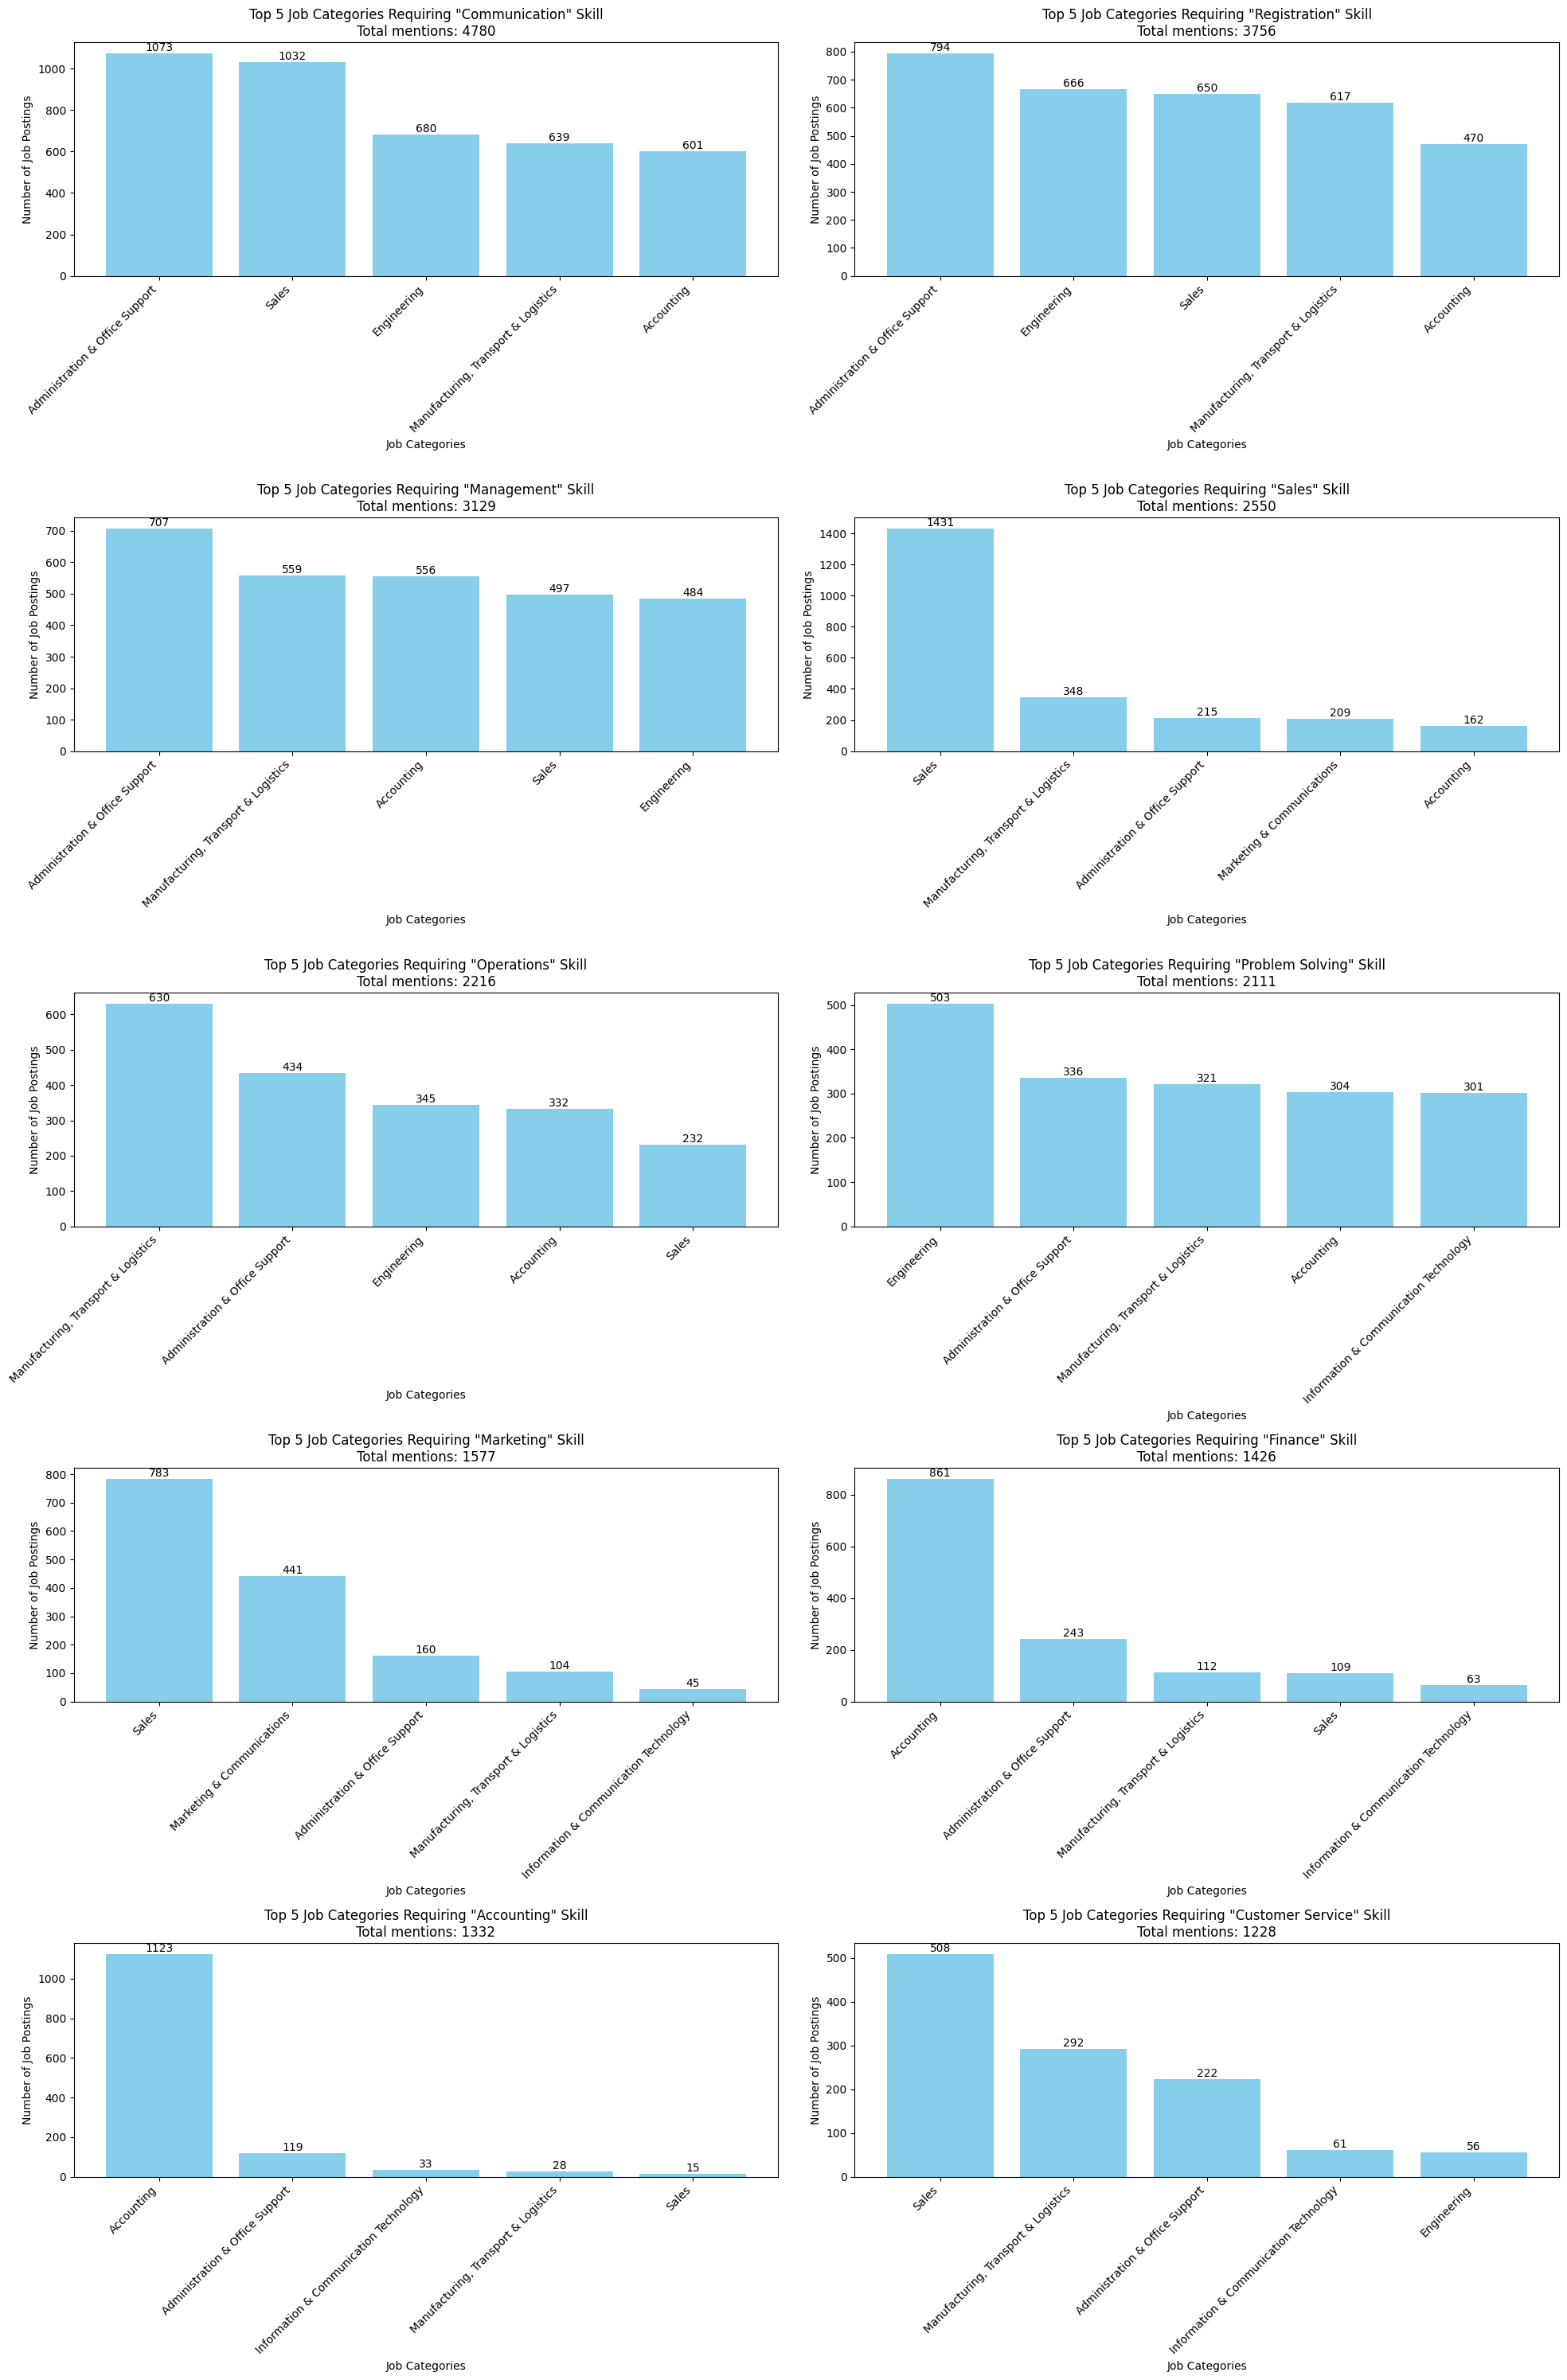

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Ensure skills are properly converted from string to list
df['ner_skills'] = df['ner_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Function to analyze skill distribution across categories
def analyze_skill_distribution(df, skill):
    # Create a list of tuples (category, has_skill)
    category_skill_count = []
    for _, row in df.iterrows():
        category= row['cluster_label']
        has_skill = 1 if skill.lower() in [s.lower() for s in row['ner_skills']] else 0
        category_skill_count.append((category, has_skill))
    
    # Convert to DataFrame and group by category
    skill_df = pd.DataFrame(category_skill_count, columns=['cluster_label', 'has_skill'])
    category_counts = skill_df.groupby('cluster_label')['has_skill'].sum().sort_values(ascending=False)
    
    return category_counts

# Get all unique skills and their frequencies
all_skills = [skill.lower() for sublist in df['ner_skills'] for skill in sublist]
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)  # Get top 10 skills

num_skills = len(top_skills)
num_cols = 2
num_rows = (num_skills + 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 6 * num_rows))
axes = axes.flatten()

for idx, (skill, count) in enumerate(top_skills):
    category_counts = analyze_skill_distribution(df, skill)
    top_categories = category_counts.head(5)

    ax = axes[idx]
    bars = ax.bar(range(len(top_categories)), top_categories.values, color='skyblue')
    
    ax.set_title(f'Top 5 Job Categories Requiring "{skill.title()}" Skill\nTotal mentions: {count}')
    ax.set_xlabel('Job Categories')
    ax.set_ylabel('Number of Job Postings')
    ax.set_xticks(range(len(top_categories)))
    ax.set_xticklabels(top_categories.index, rotation=45, ha='right')

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')

# Hide unused subplots if odd number of charts
for extra in range(idx + 1, len(axes)):
    axes[extra].axis('off')

plt.tight_layout()
plt.show()

In [16]:
df.to_csv("data/jobstreet_all_job_dataset_2025_skills_ner_clustered.csv", index=False, encoding='utf-8')